In [2]:

import os
import time
from dbio3d.memmap import load_cube, load_cube_meta_info, DataModality
from dbio3d.offset import get_indices_list, hash_to_offset


root_path = "../data/"
cube_id = 4419

type, shape = load_cube_meta_info(
    os.path.join(root_path, str(cube_id)), DataModality.GLV
)
print(shape)

dim = 100

idx = get_indices_list(1, seed=3)[0]

offset = hash_to_offset(idx)

print(offset)
minicube = load_cube(
    os.path.join(root_path, str(cube_id)),
    DataModality.GLV,
    offset=offset,
    subshape=[dim, dim, dim],
)




(2800, 1100, 1100)
(1898, 664, 249)


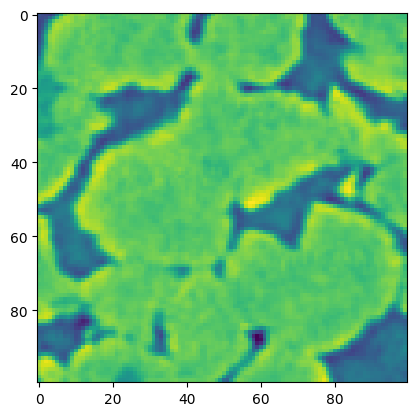

In [3]:
import matplotlib.pyplot as plt


plt.imshow(minicube[:, :, minicube.shape[2] // 2])

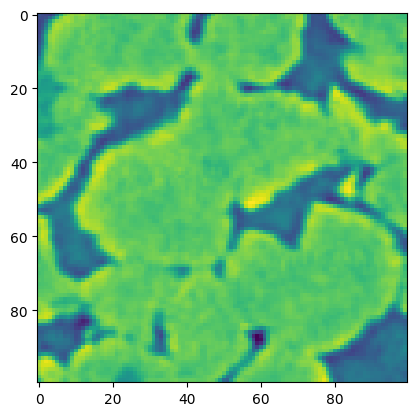

In [6]:
import os
from dbio3d import Reader, create_reader


path_map = {
    "mmap": os.path.join(root_path),
    "sqlite": os.path.join(root_path, "sqlite3.db"),
    "hdf5": os.path.join(root_path, "split.hdf5"),
    "zhdf5": os.path.join(root_path, "split.hdf5"),
    "lmdb": os.path.join(root_path, "dataset.lmdb")
}

key = "sqlite"
cube_id = 4419

with create_reader(key, path_map[key]) as s_read:
    print(s_read)
    offset, array =  s_read.load_cube(cube_id, idx)


plt.imshow(array[:, :, array.shape[2] // 2])